In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import re

def clean_whitespace(s):

    # Replace all runs of whitespace with a single dash
    s = re.sub(r"\s+", '_', s)

    return s

In [4]:
midatl = ""
with open("raw\\CRNH0203-2019-RI_Kingston_1_NW.txt", "r") as fp:
    lines = fp.readlines()

for line in lines:
    midatl += clean_whitespace(line).split("_")[9] + "\n"

with open("raw\\CRNH0203-2020-RI_Kingston_1_NW.txt", "r") as fp:
    lines = fp.readlines()

for line in lines:
    midatl += clean_whitespace(line).split("_")[9] + "\n"

with open("corrected\\S4\\MIDATL.csv", "w") as fp:
    fp.write("Temperature\n"+midatl)

In [5]:
west = ""
with open("raw\\CRNH0203-2019-WV_Elkins_21_ENE.txt", "r") as fp:
    lines = fp.readlines()

for line in lines:
    west += clean_whitespace(line).split("_")[9] + "\n"

with open("raw\\CRNH0203-2020-WV_Elkins_21_ENE.txt", "r") as fp:
    lines = fp.readlines()

for line in lines:
    west += clean_whitespace(line).split("_")[9] + "\n"

with open("corrected\\S4\\WEST.csv", "w") as fp:
    fp.write("Temperature\n"+west)

In [6]:
south = ""
with open("raw\\CRNH0203-2019-VA_Charlottesville_2_SSE.txt", "r") as fp:
    lines = fp.readlines()

for line in lines:
    south += clean_whitespace(line).split("_")[9] + "\n"

with open("raw\\CRNH0203-2020-VA_Charlottesville_2_SSE.txt", "r") as fp:
    lines = fp.readlines()

for line in lines:
    south += clean_whitespace(line).split("_")[9] + "\n"

with open("corrected\\S4\\SOUTH.csv", "w") as fp:
    fp.write("Temperature\n"+south)

In [7]:
old_MIDATL = pd.read_csv("incorrect\\S4\\MIDATL.csv")
old_SOUTH = pd.read_csv("incorrect\\S4\\SOUTH.csv")
old_WEST = pd.read_csv("incorrect\\S4\\WEST.csv")

new_MIDATL = pd.read_csv("corrected\\S4\\MIDATL.csv")
new_SOUTH = pd.read_csv("corrected\\S4\\SOUTH.csv")
new_WEST = pd.read_csv("corrected\\S4\\WEST.csv")

In [8]:
old_MIDATL["Temperature"].corr(new_MIDATL["Temperature"])

-0.007568674974751294

In [9]:
old_SOUTH["Temperature"].corr(new_SOUTH["Temperature"])

0.022627286140494723

In [10]:
old_WEST["Temperature"].corr(new_WEST["Temperature"])

0.09770340547985336

In [11]:
print(len(old_MIDATL), len(old_SOUTH), len(old_WEST))
print(len(new_MIDATL), len(new_SOUTH), len(new_WEST))

17544 17544 17544
17544 17544 17544


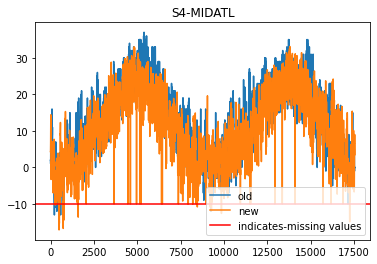

In [12]:
plt.plot(old_MIDATL["Temperature"], label="old")
plt.plot(new_MIDATL["Temperature"].replace(-9999.0, -10), label = "new")

plt.axhline(y = -10, color="red", label = "indicates-missing values")
plt.legend()
plt.title("S4-MIDATL")
plt.show()

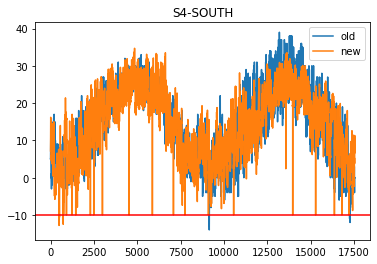

In [13]:
plt.plot(old_SOUTH["Temperature"], label="old")
plt.plot(new_SOUTH["Temperature"].replace(-9999.0, -10), label="new")

plt.axhline(y = -10, color="red")
plt.legend()
plt.title("S4-SOUTH")

plt.show()

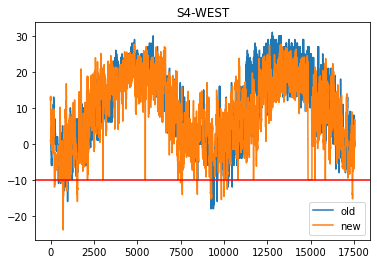

In [14]:
plt.plot(old_WEST["Temperature"], label="old")
plt.plot(new_WEST["Temperature"].replace(-9999.0, -10), label="new")

plt.axhline(y = -10, color="red")

plt.title("S4-WEST")

plt.legend()
plt.show()

In [18]:
new_SOUTH["Net"] = old_SOUTH["Net"]
new_WEST["Net"] = old_WEST["Net"]
new_MIDATL["Net"] = old_MIDATL["Net"]


In [23]:
new_MIDATL[["Net", "Temperature"]].to_csv("corrected\\S4\\MIDATL.csv", index=False)
new_WEST[["Net", "Temperature"]].to_csv("corrected\\S4\\WEST.csv", index=False)
new_SOUTH[["Net", "Temperature"]].to_csv("corrected\\S4\\SOUTH.csv", index=False)